<a href="https://colab.research.google.com/github/YamaMaki/aiasuka-data-project/blob/main/The_AiAsuka_Effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Aiasuka Effect: A Case Study on Gender Bias in Web3

## 1. Objective & Hypothesis

This case study investigates how gender identity—specifically a synthetic feminine persona—affects engagement and follower growth on X in the male-dominated Web3 space. By deploying "Aiasuka," an AI-generated persona, and bookending the experiment with authentic identity posts, it examines gender bias, parasocial attachment, and the ethical risks of synthetic personas displacing real female voices.

An AI-generated feminine persona will significantly increase engagement and follower growth through parasocial attraction and gender bias, even if suspected to be artificial. Reverting to an authentic male identity will reveal the fragility of these bonds, highlighting perceived gender’s dominance over authentic identity.

## 2. Data Loading & Cleaning

In this section, we load the raw data from a multi-tab Google Sheet. We then perform a series of data cleaning and standardization steps—including cleaning column names, consolidating redundant columns, and handling missing values—to create a single, unified DataFrame that is ready for analysis.

In [5]:
import pandas as pd
import os

file_path = os.path.join('data', 'Web3 Gender Bias Analysis (2).xlsx')

# read all tabs into a dictionary of DataFrames
all_tabs = pd.read_excel(file_path, sheet_name=None)

# Combine all DataFrames into one master DataFrame
master_df = pd.concat(all_tabs.values(), ignore_index=True)

# Print the combined DataFrame
print("--- Successfully loaded and combined DataFrame ---")
print(master_df.head())
print("\n--- Checking the 'Phase' column values ---")
print(master_df['Phase'].value_counts())

--- Successfully loaded and combined DataFrame ---
        Date      Time Day Number Post Type           Post ID  \
0 2025-04-09  05:14:00         D1        GM     GM-D1-001-5AM   
1 2025-04-09  08:47:00         D1      misc   misc-D1-001-8AM   
2 2025-04-09  09:17:00         D1      misc   misc-D1-002-9AM   
3 2025-04-09  11:00:00         D1      misc  misc-D1-003-11AM   
4 2025-04-09  11:15:00         D1      misc  misc-D1-004-11AM   

                                           Post Text  Impressions  \
0  GM to absolutely everyone!! What are you grate...          164   
1  dont fade the wizards lol, seems we make bigge...           78   
2  I'm ngl man i'm stressed today. Prayers and po...          108   
3                                   whos active rn?            90   
4  Have a NFT valued for 1.18 $SOL solana but not...          109   

   Engagements  Likes  Reposts  ...  Control        Post Format  \
0           47     22        0  ...        Y   GM Post w/ image   
1        

In [6]:

print("--- 1. Overall DataFrame Info ---")
# This will show us all the column names, and how many non-null values are in each.
master_df.info()

print("\n\n--- 2. Count of Missing Values per Column ---")
# This gives a direct count of how many NaN values are in each column.
# We expect to see a lot here because of the different column structures.
print(master_df.isnull().sum())

print("\n\n--- 3. Let's Look at the Column Names ---")
# This will show us all the column names so we can spot inconsistencies.
print(master_df.columns)

--- 1. Overall DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       129 non-null    datetime64[ns]
 1   Time                       129 non-null    object        
 2   Day Number                 129 non-null    object        
 3   Post Type                  129 non-null    object        
 4   Post ID                    129 non-null    object        
 5   Post Text                  127 non-null    object        
 6   Impressions                129 non-null    int64         
 7   Engagements                129 non-null    int64         
 8   Likes                      129 non-null    int64         
 9   Reposts                    129 non-null    int64         
 10  Replies                    129 non-null    int64         
 11  Bookmarks                  129 non-nu

In [7]:
print("--- Original Column Names ---")
print(master_df.columns)

#we will now go and apply a series of cleaning steps to each column name
new_columns = master_df.columns
new_columns = new_columns.str.lower() # 1. convert to lowercase
new_columns = new_columns.str.replace(' ', '_') # 2. Replace spaces with underscores
new_columns = new_columns.str.replace('(y/n)', '', regex=False) #3. remove (y/n)
new_columns = new_columns.str.replace('(%)', '_pct', regex=False) # 4. replace (%) with _pct
new_columns = new_columns.str.replace('.', '_', regex=False) #5. replace . with _
master_df.columns = new_columns

print("\n--- Updated Column Names ---")
print(master_df.columns)

print("\n--- DataFrame Head with Clean Columns")
print(master_df.head())

--- Original Column Names ---
Index(['Date', 'Time', 'Day Number', 'Post Type', 'Post ID', 'Post Text',
       'Impressions', 'Engagements', 'Likes', 'Reposts', 'Replies',
       'Bookmarks', 'Engagement Rate (%)', 'Image Attached (Y/N)', 'Control',
       'Post Format', 'Image Theme', 'AI Asuka Involved',
       'In-Group Activity Present', 'Assumed Poster', 'Comment Summary',
       'Notes', 'Phase', 'Post Type.1'],
      dtype='object')

--- Updated Column Names ---
Index(['date', 'time', 'day_number', 'post_type', 'post_id', 'post_text',
       'impressions', 'engagements', 'likes', 'reposts', 'replies',
       'bookmarks', 'engagement_rate__pct', 'image_attached_', 'control',
       'post_format', 'image_theme', 'ai_asuka_involved',
       'in-group_activity_present', 'assumed_poster', 'comment_summary',
       'notes', 'phase', 'post_type_1'],
      dtype='object')

--- DataFrame Head with Clean Columns
        date      time day_number post_type           post_id  \
0 2025-04-09

In [8]:
# Let's see what's inside the two post_type columns

print("--- Investigating 'post_type' column ---")
print(master_df['post_type'].value_counts(dropna=False))

print("\n\n--- Investigating 'post_type_1' column ---")
print(master_df['post_type_1'].value_counts(dropna=False))

--- Investigating 'post_type' column ---
post_type
misc       85
GM         20
GN         16
Misc        6
GM post     1
GA          1
Name: count, dtype: int64


--- Investigating 'post_type_1' column ---
post_type_1
NaN                    78
Text post w/Image      11
Text post              10
GM post w/ Image        7
Quote Post              7
GN post w/Image         5
Text Post               3
X Space post            2
Quote Post w/ Image     1
Live stream post        1
text post w/video       1
text post               1
quote post              1
X space post            1
Name: count, dtype: int64


In [9]:
print("--- Investigating ALL Post Category Columns ---")

print("\n--- Column: 'post_type' (Cleaned) ---")
# We already cleaned this one, so the output should look good
print(master_df['post_type'].value_counts(dropna=False))

print("\n--- Column: 'post_format' ---")
# This is the one we just discovered from the other sheet
print(master_df['post_format'].value_counts(dropna=False))

print("\n--- Column: 'post_type_1' ---")
# This was the other one we found
print(master_df['post_type_1'].value_counts(dropna=False))

--- Investigating ALL Post Category Columns ---

--- Column: 'post_type' (Cleaned) ---
post_type
misc       85
GM         20
GN         16
Misc        6
GM post     1
GA          1
Name: count, dtype: int64

--- Column: 'post_format' ---
post_format
NaN                     51
Text post w/Image       19
Text post               10
GM Post w/ image         8
text post                8
quote post               7
GN post w/ Image         6
GN Post w/ image         5
GM post w/ image         5
Misc post w/ video       2
Lunch Post w/ image      1
Reply w/ images          1
Quote post               1
Misc post w/ image       1
GA post w/ Image         1
Space reminder           1
activity Post w/ GIF     1
Poll                     1
Name: count, dtype: int64

--- Column: 'post_type_1' ---
post_type_1
NaN                    78
Text post w/Image      11
Text post              10
GM post w/ Image        7
Quote Post              7
GN post w/Image         5
Text Post               3
X Space post 

In [10]:
# --- Complete Data Unification Script ---

import numpy as np
import pandas as pd

# Step 1: Coalesce the two descriptive columns ('post_format' and 'post_type_1')
# This creates a new column, filling NaN values in the first with values from the second.
master_df['temp_category'] = master_df['post_format'].combine_first(master_df['post_type_1'])

print("--- Step 1 Complete: Combined the two descriptive columns. ---")


# Step 2: Standardize the new combined category column
# We write a custom function to clean up all the messy, inconsistent text.

def standardize_post_type(category):
    # First, handle any potential missing values that might still exist
    if pd.isnull(category):
        return 'Unknown'

    # Convert text to lowercase to handle case inconsistencies (e.g., 'Text post' vs 'text post')
    cat_lower = str(category).lower()

    # Now, check for keywords to group similar post types together
    if 'gm' in cat_lower:
        return 'GM Post'
    elif 'gn' in cat_lower:
        return 'GN Post'
    elif 'quote' in cat_lower:
        return 'Quote Post'
    elif 'text' in cat_lower:
        return 'Text Post'
    elif 'space' in cat_lower:
        return 'X Space'
    elif 'ga' in cat_lower:
        return 'GA Post'
    # This is a catch-all for any other specific types we didn't define a rule for
    else:
        return 'Misc Post'

# Use the .apply() method to run our custom function on every row of the 'temp_category' column
master_df['post_category'] = master_df['temp_category'].apply(standardize_post_type)

print("--- Step 2 Complete: Created a single, clean 'post_category' column. ---")


# Step 3: Final Cleanup of the DataFrame
# Now that we have our master 'post_category', we can drop the old, messy columns to tidy up.
columns_to_drop = ['post_type', 'post_format', 'post_type_1', 'temp_category']
master_df = master_df.drop(columns=columns_to_drop)

print("--- Step 3 Complete: Dropped the old, messy columns. ---")


# Step 4: Verification
# Let's look at the final results to confirm our work.
print("\n--- FINAL VERIFICATION ---")
print("\nValue Counts for our clean 'post_category' column:")
print(master_df['post_category'].value_counts())

print("\nHead of our final, cleaned DataFrame:")
print(master_df.head())



--- Step 1 Complete: Combined the two descriptive columns. ---
--- Step 2 Complete: Created a single, clean 'post_category' column. ---
--- Step 3 Complete: Dropped the old, messy columns. ---

--- FINAL VERIFICATION ---

Value Counts for our clean 'post_category' column:
post_category
Text Post     63
GM Post       20
Quote Post    17
GN Post       16
Misc Post      8
X Space        4
GA Post        1
Name: count, dtype: int64

Head of our final, cleaned DataFrame:
        date      time day_number           post_id  \
0 2025-04-09  05:14:00         D1     GM-D1-001-5AM   
1 2025-04-09  08:47:00         D1   misc-D1-001-8AM   
2 2025-04-09  09:17:00         D1   misc-D1-002-9AM   
3 2025-04-09  11:00:00         D1  misc-D1-003-11AM   
4 2025-04-09  11:15:00         D1  misc-D1-004-11AM   

                                           post_text  impressions  \
0  GM to absolutely everyone!! What are you grate...          164   
1  dont fade the wizards lol, seems we make bigge...        

In [11]:
master_df = master_df.drop('notes', axis=1)
print(master_df.head())

        date      time day_number           post_id  \
0 2025-04-09  05:14:00         D1     GM-D1-001-5AM   
1 2025-04-09  08:47:00         D1   misc-D1-001-8AM   
2 2025-04-09  09:17:00         D1   misc-D1-002-9AM   
3 2025-04-09  11:00:00         D1  misc-D1-003-11AM   
4 2025-04-09  11:15:00         D1  misc-D1-004-11AM   

                                           post_text  impressions  \
0  GM to absolutely everyone!! What are you grate...          164   
1  dont fade the wizards lol, seems we make bigge...           78   
2  I'm ngl man i'm stressed today. Prayers and po...          108   
3                                   whos active rn?            90   
4  Have a NFT valued for 1.18 $SOL solana but not...          109   

   engagements  likes  reposts  replies  ...  engagement_rate__pct  \
0           47     22        0       20  ...             28.658537   
1           14      9        0        1  ...             30.769231   
2           33     17        0       14  ...

In [12]:
# Identify the categorical columns that still have missing values
# Based on our diagnostic, these are the main ones (excluding 'post_text' for now)
cols_to_fill = [
    'image_attached_',
    'control',
    'image_theme',
    'ai_asuka_involved',
    'in-group_activity_present',
    'assumed_poster',
    'comment_summary'
]

# Loop through the list of columns and fill any missing values with 'Unknown'
for col in cols_to_fill:
    if col in master_df.columns: # A safe check to make sure the column exists
        master_df[col] = master_df[col].fillna('Unknown')

# --- Final Verification ---
# Let's run our missing value check one last time to confirm our work.
print("--- Final Missing Value Check ---")
print(master_df.isnull().sum())

--- Final Missing Value Check ---
date                         0
time                         0
day_number                   0
post_id                      0
post_text                    2
impressions                  0
engagements                  0
likes                        0
reposts                      0
replies                      0
bookmarks                    0
engagement_rate__pct         0
image_attached_              0
control                      0
image_theme                  0
ai_asuka_involved            0
in-group_activity_present    0
assumed_poster               0
comment_summary              0
phase                        0
post_category                0
dtype: int64


## 3. Exploratory Analysis & Visualizations

### 3.1 Average Impressions per Phase

To get a high-level overview of the experiment's impact, we first analyze the average number of impressions per post for each of the three phases. The bar chart below clearly shows a significant spike in impressions during the 'Persona' phase, with a sustained "halo effect" into the 'Post' phase.

In [13]:
# preparing data for our specific plot
# we will group our clean master_df by phase and calculate the mean of the impressions
phase_impressions = master_df.groupby('phase')['impressions'].mean().reset_index()
print(phase_impressions)

     phase  impressions
0  Control   218.191489
1  Persona   486.096774
2     Post   354.705882


['Control' 'Persona' 'Post']


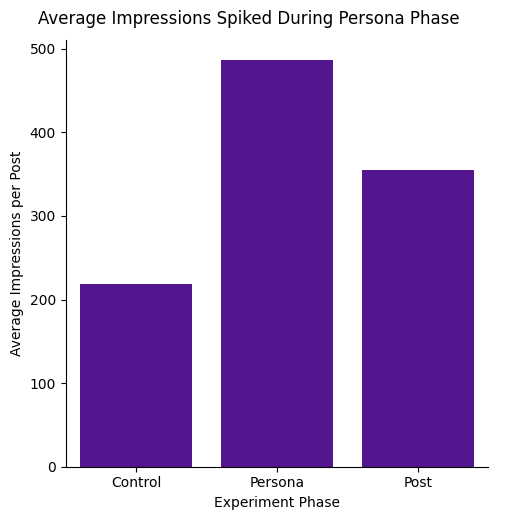

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# import in seaborn and its supporting library for visualization

# we are going to make sure the names in our summary table are correct
# (they might have been cleaned again during the load process)
print(phase_impressions['phase'].unique())

#create a list that defines the correct chronological order
phase_order = ['Control', 'Persona', 'Post']

#create the bar plot with the correct order of phases
sns.catplot(x='phase', y='impressions', data=phase_impressions, kind='bar', order=phase_order)

#adding a clear, story-driven title
plt.suptitle('Average Impressions Spiked During Persona Phase', y=1.03)

#adding the axis labels for a clearer story
plt.xlabel('Experiment Phase')
plt.ylabel('Average Impressions per Post')

# Saving the figure to repo /visuals folder
save_path = os.path.join('visuals', 'average_impressions_by_phase.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()


### 3.2 Relationship Between Impressions and Engagements by Phase

To understand the dynamics of engagement, we can plot impressions versus total engagements for each post. The faceted scatter plot below shows this relationship for each of the three experiment phases. We can observe a generally positive correlation, but the density and spread of the data points differ noticeably across the phases, particularly in the 'Persona' phase which saw higher-impression posts.

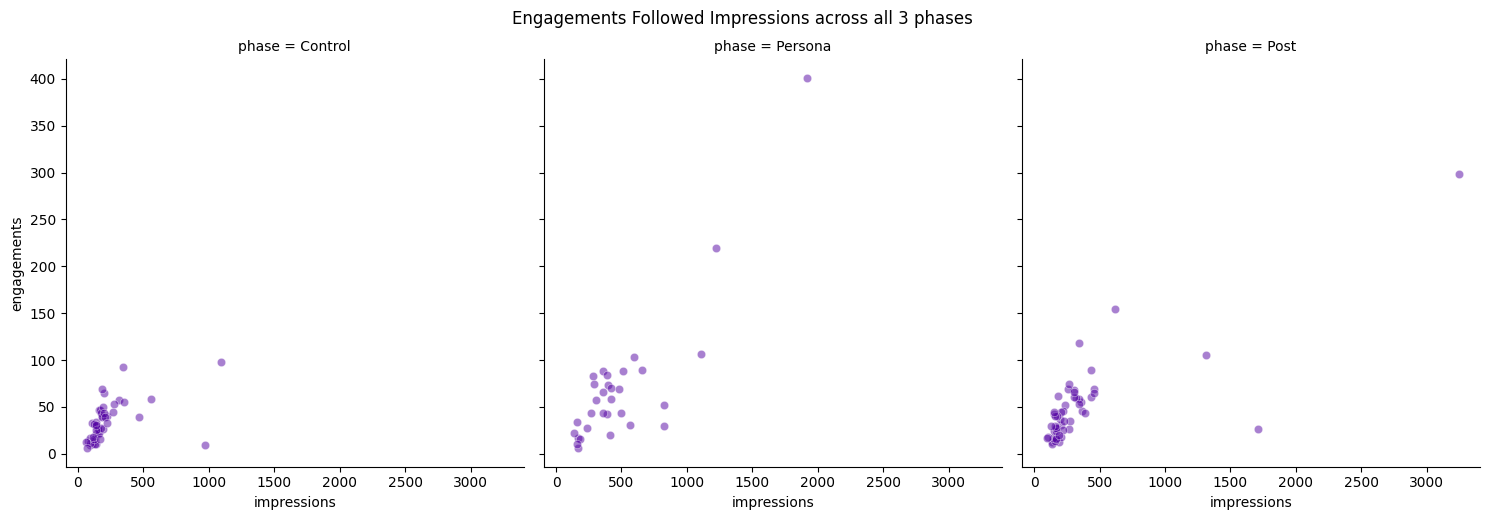

In [19]:
# we are making a relplot that shows the relationship between impressions and
# engagements per phase

#create a list that defines the correct chronological order
phase_order = ['Control', 'Persona', 'Post']

# setting up the palette for the scatter plot for easier visualization
sns.set_palette('plasma')


# create the rel plot with the correct order of phases, impressions and
# engagements
sns.relplot(x='impressions', y='engagements', data=master_df, kind='scatter', col_order=phase_order, col='phase',alpha=0.5)

#adding a clear, story-driven title
plt.suptitle('Engagements Followed Impressions across all 3 phases ', y=1.03)

# Saving the figure to repo /visuals folder
save_path = os.path.join('visuals', 'Engagements_followed_impressions.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()

### 3.3 Deeper Dive into Engagement Rates

To understand the nuances of the engagement rate, a heatmap allows us to compare the average rates across every post category and experiment phase simultaneously. The heatmap below reveals a key insight: while the 'Persona' phase drove higher impressions, the 'Control' phase actually had the highest engagement rates for its core post types (GM/GN), indicating a more dedicated, albeit smaller, audience.

--- Preparing Data for the Heatmap ---


/tmp/ipykernel_27074/2062199037.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_pivot = master_df.pivot_table(


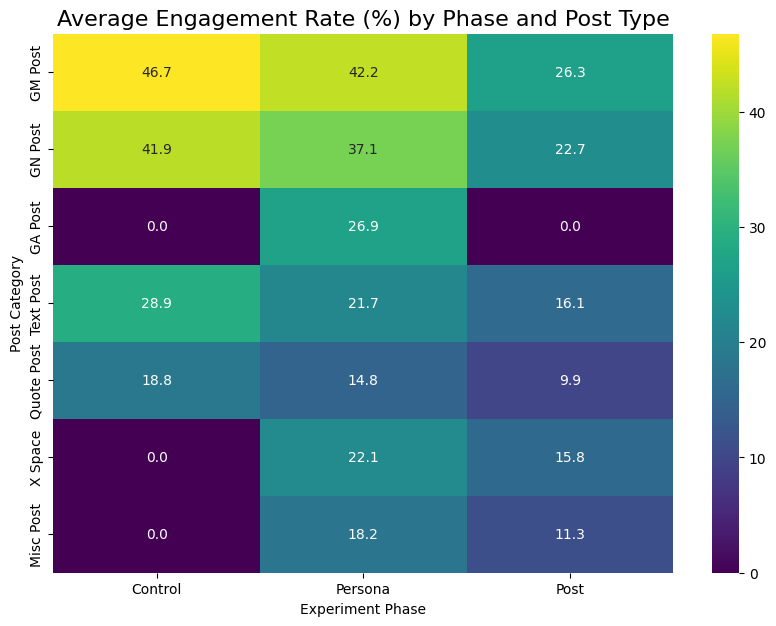

In [20]:
# (Assuming master_df is our clean DataFrame from the previous steps)

print("--- Preparing Data for the Heatmap ---")

# First, let's make sure our phases are in the correct chronological order
# We can do this by converting the 'phase' column to a categorical data type
phase_order = ['Control', 'Persona', 'Post']
master_df['phase'] = pd.Categorical(master_df['phase'], categories=phase_order, ordered=True)

# Now, pivot the data to create the grid format needed for a heatmap
heatmap_pivot = master_df.pivot_table(
    values='engagement_rate__pct',  # The values to fill the grid
    index='post_category',         # The rows of the grid
    columns='phase'                # The columns of the grid
)

# 1. Define a more logical order for our post categories (the rows)
category_order = ['GM Post', 'GN Post', 'GA Post', 'Text Post', 'Quote Post', 'X Space', 'Misc Post']

# 2. Re-order the pivot table's index to match our logical order
heatmap_pivot = heatmap_pivot.reindex(category_order)

# 3. Fill any missing values with 0 for a cleaner visual
heatmap_pivot_clean = heatmap_pivot.fillna(0)


# --- The New, Improved Heatmap ---

# Make the figure a bit bigger to give it space
plt.figure(figsize=(10, 7))

# Plot the cleaned and re-ordered pivot table
sns.heatmap(data=heatmap_pivot_clean,
            annot=True,
            fmt=".1f",
            cmap='viridis')

# Add a clearer title and labels
plt.title('Average Engagement Rate (%) by Phase and Post Type', fontsize=16)
plt.xlabel('Experiment Phase')
plt.ylabel('Post Category')

# Saving the figure to repo /visuals folder
save_path = os.path.join('visuals', 'average_engagement_rate_by_phase_post_type.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

## 4. Follower Growth Analysis

One of the primary outcomes of the experiment was the rapid follower growth observed during the 'Persona' phase. This section analyzes the follower trend over the entire observation period. The data, based on snapshots from X Analytics and later corrected, shows that the vast majority of the account's growth occurred during the 7-day 'Persona' phase.

successfully loaded data from Github!
        Date Followers
0  3/31/2025  1,000.00
1  4/15/2025  1,300.00
2  4/22/2025  2,000.00
3  4/29/2025  2,250.00
4   5/8/2025  2,168.00
Columns found in your CSV file:
Index(['Date', 'Followers'], dtype='object')


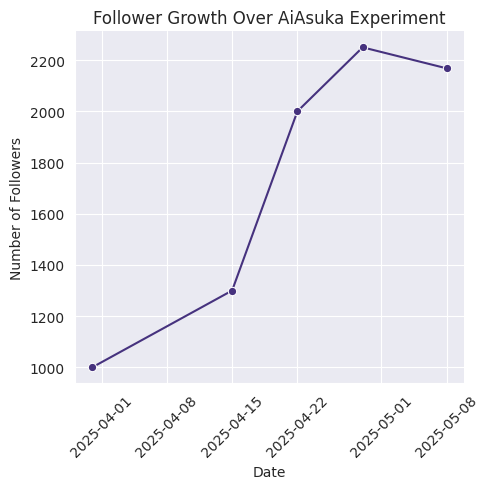

In [21]:
# the URL to the raw CSV file on Github
csv_path = os.path.join('data', 'follower_growth - Sheet1.csv')

#allow pandas to read the csv from the url
followers_df = pd.read_csv(csv_path)

print("successfully loaded data from Github!")
print(followers_df.head())

# Convert 'Date' column to datetime objects for proper plotting
followers_df['Date'] = pd.to_datetime(followers_df['Date'])

# Convert 'Followers' column to a numeric type (float or int)
followers_df['Followers'] = followers_df['Followers'].str.replace(',', '').astype(float)

# --- The Investigation ---
# We are checking for columns and values inside to make sure that its cleaned
print("Columns found in your CSV file:")
print(followers_df.columns)


sns.set_style('darkgrid')
sns.set_palette('viridis')

sns.relplot(x='Date', y='Followers', data=followers_df, kind='line', marker='o')
plt.title('Follower Growth Over AiAsuka Experiment')
plt.xlabel('Date')
plt.ylabel('Number of Followers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 5. Statistical Validation

To ensure the observed differences in the data were not due to random chance, a series of statistical tests were performed. We used independent t-tests to compare the mean engagement rates between pairs of phases and a one-way ANOVA to compare the mean impressions across all three phases. The significance level (alpha) was set at 0.05.

In [22]:
from scipy.stats import ttest_ind

print("--- Running Full Statistical Validation on Engagement Rates ---")

# --- 1. Prepare Data Samples for All Phases ---
control_rates = master_df[master_df['phase'] == 'Control']['engagement_rate__pct']
persona_rates = master_df[master_df['phase'] == 'Persona']['engagement_rate__pct']
post_rates = master_df[master_df['phase'] == 'Post']['engagement_rate__pct']

# --- 2. Run All Three T-Tests ---
stat_cvp, p_value_cvp = ttest_ind(control_rates, persona_rates)
stat_pvp, p_value_pvp = ttest_ind(persona_rates, post_rates)
stat_cvsp, p_value_cvsp = ttest_ind(control_rates, post_rates)

# --- 3. Print a Clean Summary of Results ---
print("\n--- T-Test Results Summary (alpha = 0.05) ---")

# Comparison 1: Control vs. Persona
print(f"\n1. Control Phase vs. Persona Phase:")
print(f"   P-value: {p_value_cvp:.4f}")
if p_value_cvp < 0.05:
    print("   Result: The difference IS statistically significant.")
else:
    print("   Result: The difference IS NOT statistically significant.")

# Comparison 2: Persona vs. Post
print(f"\n2. Persona Phase vs. Post Phase:")
print(f"   P-value: {p_value_pvp:.4f}")
if p_value_pvp < 0.05:
    print("   Result: The difference IS statistically significant.")
else:
    print("   Result: The difference IS NOT statistically significant.")

# Comparison 3: Control vs. Post
print(f"\n3. Control Phase vs. Post Phase:")
print(f"   P-value: {p_value_cvsp:.4f}")
if p_value_cvsp < 0.05:
    print("   Result: The difference IS statistically significant.")
else:
    print("   Result: The difference IS NOT statistically significant.")


--- Running Full Statistical Validation on Engagement Rates ---

--- T-Test Results Summary (alpha = 0.05) ---

1. Control Phase vs. Persona Phase:
   P-value: 0.0779
   Result: The difference IS NOT statistically significant.

2. Persona Phase vs. Post Phase:
   P-value: 0.0000
   Result: The difference IS statistically significant.

3. Control Phase vs. Post Phase:
   P-value: 0.0000
   Result: The difference IS statistically significant.


In [23]:
from scipy.stats import f_oneway

# --- Prepare the Data Samples for the ANOVA Test ---

# Create a Series containing all impressions from the 'Control' phase
control_impressions = master_df[master_df['phase'] == 'Control']['impressions']

# Create a Series containing all impressions from the 'Persona' phase
persona_impressions = master_df[master_df['phase'] == 'Persona']['impressions']

# Create a Series containing all impressions from the 'Post' phase
post_impressions = master_df[master_df['phase'] == 'Post']['impressions']


# --- Verify our samples ---
print("--- Data Ready for ANOVA Test ---")
print(f"Number of 'Control' samples: {len(control_impressions)}")
print(f"Average Control Impressions: {control_impressions.mean():.0f}")

print(f"\nNumber of 'Persona' samples: {len(persona_impressions)}")
print(f"Average Persona Impressions: {persona_impressions.mean():.0f}")

print(f"\nNumber of 'Post' samples: {len(post_impressions)}")
print(f"Average Post Impressions: {post_impressions.mean():.0f}")

#run the ANOVA test:
f_oneway(control_impressions, persona_impressions, post_impressions)


--- Data Ready for ANOVA Test ---
Number of 'Control' samples: 47
Average Control Impressions: 218

Number of 'Persona' samples: 31
Average Persona Impressions: 486

Number of 'Post' samples: 51
Average Post Impressions: 355


F_onewayResult(statistic=np.float64(4.716400787932678), pvalue=np.float64(0.010586222318451426))

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Load the Data ---

followers_df = pd.read_csv(csv_path)

# --- 2. Initial Inspection ---
print("--- Follower Data Loaded Successfully ---")
print("First 5 rows:")
print(followers_df.head())

print("\n--- Data Info ---")
# Let's check the column names and data types (Dtypes)
followers_df.info()

--- Follower Data Loaded Successfully ---
First 5 rows:
        Date Followers
0  3/31/2025  1,000.00
1  4/15/2025  1,300.00
2  4/22/2025  2,000.00
3  4/29/2025  2,250.00
4   5/8/2025  2,168.00

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       5 non-null      object
 1   Followers  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


### Summary Statistics Table

To provide a clear, high-level overview of the key performance indicators for each phase, the following summary table was generated from the clean dataset. This table serves as the primary source of truth for the metrics cited throughout this analysis.

In [26]:
# this code block will calculate the key summary stats for each phase
# First, we will group by the 'phase column and aggregate our metrics
phase_summary = master_df.groupby('phase').agg(
    total_impressions=('impressions', 'sum'),
    total_engagements=('engagements', 'sum'),
    average_engagement_rate=('engagement_rate__pct', 'mean')
)

# we are going to format the engagement rate to be a percentage, rounded to 2
# decimal places
phase_summary['average_engagement_rate'] = (phase_summary['average_engagement_rate']).round(2)

print("--- Validation of Key Metrics from Cleaned Data ---")
print(phase_summary)

--- Validation of Key Metrics from Cleaned Data ---
         total_impressions  total_engagements  average_engagement_rate
phase                                                                 
Control              10255               1588                    32.21
Persona              15069               2171                    26.70
Post                 18090               2541                    16.91


/tmp/ipykernel_27074/203277174.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  phase_summary = master_df.groupby('phase').agg(


## 6. Conclusion & Final Thoughts

### Key Findings

This analysis, validated with a cleaned and unified dataset, confirms the core findings of the Aiasuka experiment:

* **Finding 1:** The introduction of the synthetic "Persona" generated a massive, statistically significant increase in **impressions** and **follower growth**, proving the effectiveness of this strategy for capturing audience attention in the short term.
* **Finding 2:** However, this growth in reach came at the cost of engagement *quality*. The average **engagement rate** was highest in the authentic "Control" phase, and the difference between the Control and Persona phases was not statistically significant.
* **Finding 3:** The end of the experiment in the "Post" phase caused a severe, statistically significant **drop in engagement rates**, demonstrating the fragile and unsustainable nature of the parasocial bonds formed with the synthetic persona.

### Ethical Implications & The "Synthetic Femme" Problem

7. Insights
7.1 Gender Bias Amplifies Virality
Aiasuka’s +47% Impression spike (15,069 vs. 10,255) and ~700+ follower gain, driven by selfies and $SOL giveaways (e.g., April 22 GM, 33.91%), reflect gender bias. Persona’s 26.70% Engagement Rate is lower than Control’s 32.21% (e.g., 69.52% GM), but GM (39.13%) and GN (37.75%) outperform Control’s Misc (28.07%), showing synthetic femininity’s strength.

7.2 Parasocial Drift Spectrum
Persona-phase replies (e.g., “goodmorning babe”) showed emotional investment, with flirty, supportive, and begging comments (e.g., April 22 GM, 79 Replies). Control’s neutral replies (e.g., April 15 GM, 31 Replies) contrast with Post-phase’s superficial affirmations (e.g., “Facts 💯”). The April 23 bookend (9.18%, 72 Replies) reflects shock (e.g., “SO UR NOT A GIRL”), with ~60% of Persona followers disengaging emotionally.

7.3 Engagement Trade-Off
Control’s 32.21% Engagement Rate (e.g., 44.20% Misc “story in 3 images”) reflects authentic Web3 appeal. Persona’s 26.70% (e.g., 40.41% GN) and Post’s 16.91% (e.g., 34.30% GM) show a trade-off: Aiasuka’s GM (39.13%) outperformed Control’s Misc (28.07%), but Post-phase GM (24.12%) and “Facts 💯” replies lack emotional depth.

7.4 Halo Effect
Post-phase Impressions (384.3 avg, 3247 max for bookend) and ~250 follower gain confirm Aiasuka’s lasting visibility. The decline from 26.70% to 16.91% Engagement Rate and from Persona GM (39.13%) to Post GM (24.12%) shows fading emotional bonds, unlike Control’s consistent 32.21%.

7.5 Authenticity vs. Perception
Bookends (17.39%, 9.18%) underperformed Control (32.21%) and Persona (26.70%). Control’s Misc (28.07%) outperforms Persona’s Misc (20.33%) and Post’s Misc (14.27%), but slower Post-phase follower growth (~250 vs. ~700) confirms synthetic femininity’s dominance.

8. Post-Reveal Dynamics
The Post phase shows a trajectory of disengagement:
Immediate Shock (April 23): The bookend (9.18%, 72 Replies) reflects surprise (“SO UR NOT A GIRL” @MxmetaX) and positivity (“Handsome”). Lower Engagement Rate vs. Persona’s 26.70% confirms Aiasuka’s pull.

Early Post-Phase (April 24–25): GM/GN posts (e.g., April 25 GM, 34.30%, 48 Replies; April 24 GN, 21.94%, 20 Replies) show strong engagement, driven by $SOL giveaways (e.g., April 24 GM, 24.80%, 66 Replies) and motivational content (e.g., April 25 Misc, 27.63%).

Mid Post-Phase (April 26–27): GM/GN posts remain strong (e.g., April 27 GM, 26.95%, 29 Replies; April 27 GN, 21.64%, 21 Replies), but Misc posts vary (e.g., April 27 Misc, 22.73%, 9 Replies). Spiritual (e.g., April 27 Misc “Psalm 27:1”) and community posts (@Teatimemeta) resonate, but lack Persona’s intensity (e.g., April 22 GN, 40.41%).

Giveaway Boost: Solana/Doge giveaways sustained engagement, but superficial replies signal limited connection.

Trust Erosion: Skeptical and detached replies, with slower follower growth (~250 vs. ~700), highlight trust erosion risks. Community ties (@Teatimemeta, #Dogwarts) maintain moderate engagement.

9. Ethical Warning: The Synthetic Femme Problem
Aiasuka’s 15,069 Impressions, 26.70% Engagement Rate, and ~700+ follower gain dwarf female creator benchmarks (5,000–8,000 Impressions, 10–15% Engagement Rates). Control’s 32.21% shows authentic appeal, but Post’s 16.91% and “Facts 💯” replies highlight risks:
Attention Displacement: Synthetic personas dominate Web3’s attention economy.

Trust Erosion: Detached replies (e.g., “Preach that wisdom king”) and shock (e.g., “catfish!!! LOL”) suggest synthetic personas exploit emotional investment.

Stereotype Reinforcement: Aiasuka’s idealized selfies perpetuate unattainable femininity.

Algorithmic Bias: Persona’s 5.26% Replies and ~60% follower growth amplified synthetic content, while Post’s 4.33% reflects reduced favor.

10. Mitigation Tactics
Amplify real female creators via X Spaces or NFT collaborations, leveraging tools like Metaplex.

Require AI personas to disclose artificiality.

Advocate for X algorithmic audits.

Educate Web3 on parasocial risks.

11. Application for Brands
Short-Term Visibility: Synthetic personas boost Impressions (15,069) and followers (~700 in 7 days).

Hybrid Approach: Pair AI with real creators, as seen in April 27 Misc’s influencer mentions.

Metrics-Driven: Prioritize Replies (e.g., 79 for April 22 GM, 66 for April 24 GM).

Long-Term Trust: Post’s 16.91% Engagement Rate and “algorithmic fill” replies show synthetic personas’ unsustainability, unlike Control’s 32.21%.

### Final Thought

The Aiasuka experiment highlights a critical tension in our increasingly digital world, demonstrating that while audiences may be drawn to idealized synthetic personas, the resulting connections are fragile and raise profound ethical questions about authenticity and trust online.